# Find Hamiltonian paths or cycles

In [1]:
%pylab inline

import yaml

from hamilton import Hamilton

Populating the interactive namespace from numpy and matplotlib


## Basic usage

Some helper functions for this demonstration.

In [2]:
def visualise(board, size=7, decorations=True):
    figsize(size, size)
    set_cmap('jet')
    imshow(board, interpolation='nearest')
    if decorations:
        colorbar()


def get_moves(filename):
    return yaml.load(open(filename))['moves']

def mod_board(board, mod=2):
    b = []
    
    for i in range(len(board)):
        b.append([])
        for j in range(len(board[0])):
            b[-1].append(board[i][j] % mod)
    return b

def visualise_moves(moves, size=9):
    x = y = size // 2
    board = [[0] * size for _ in range(size)]
    board[x][y] = 2
    
    for move in moves:
        board[x + move[0]][y + move[1]] = 1
    
    return board

### Example one: Metita

This ruleset allows a piece to move either three squares horizontally or vertically, or two squares diagonally. The 10 by 10 case is a game served [here](http://www.metita.net/Stuffs/100/100.htm).

/tmp/ipykernel_3834965/549749485.py:10: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  return yaml.load(open(filename))['moves']


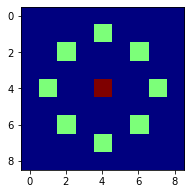

In [3]:
metita_moves = get_moves('metita.yml')
visualise(visualise_moves(metita_moves), size=3, decorations=False)

The piece can move from the central square (red) to any of the green squares.

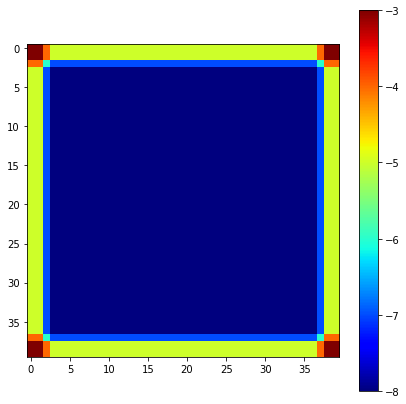

In [4]:
metita = Hamilton(metita_moves, 40, 40, 0, 0)
visualise(metita.board)

The board is initialised with negative values. Each value represents the number of valid moves that can be made from that location. Notice that the corners and edges are less accessible than the squares in the center.

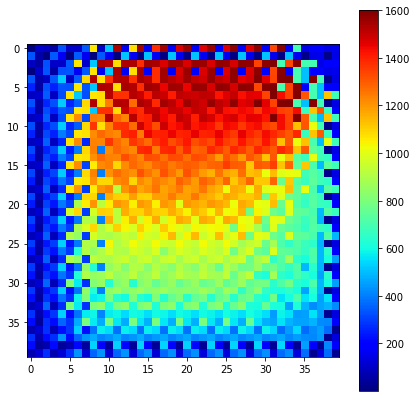

In [5]:
metita.solve()
visualise(metita.board)

The solution is visualised by colouring the moves according to their rank. The path starts dark blue, then progresses to green and ends as dark red.

### Example two: Knight's tour

This ruleset describes the moves of a knight in a game of chess.

/tmp/ipykernel_3834965/549749485.py:10: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  return yaml.load(open(filename))['moves']


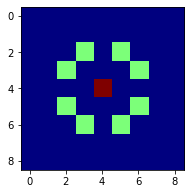

In [6]:
knight_moves = get_moves('knight.yml')
visualise(visualise_moves(knight_moves), size=3, decorations=False)

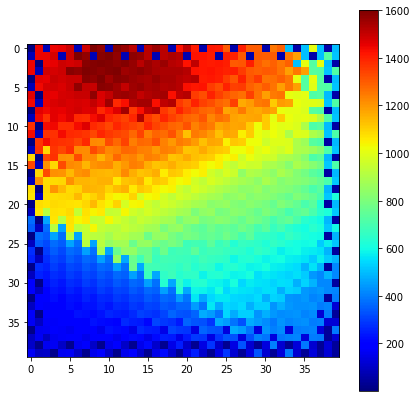

In [7]:
knight = Hamilton(knight_moves, 40, 40, 0, 0)
knight.solve()
visualise(knight.board)

Notice that the filling pattern is quite different from the previous one.

### Example three: A closed Knight's tour.

The function `reset` allows us to re-initialise the board, change the initial position and change the option to find a closed path.

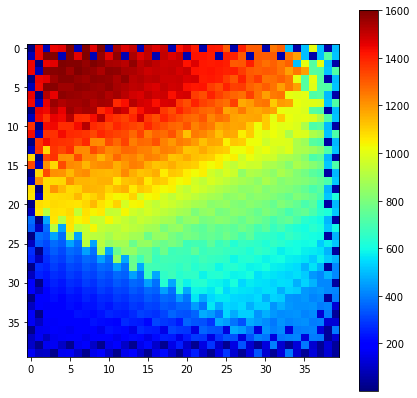

In [8]:
knight.reset(0, 0, closed=True)
knight.solve()
visualise(knight.board)

Notice that the global configuration is not very different from the one obtained by searching for an open path. The difference seems to be mostly in the last part of the path.

### Example four: Spider

The following ruleset is a combination of the previous two.

/tmp/ipykernel_3834965/549749485.py:10: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  return yaml.load(open(filename))['moves']


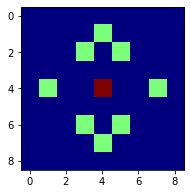

In [9]:
spider_moves = get_moves('spider.yml')
visualise(visualise_moves(spider_moves), size=3, decorations=False)

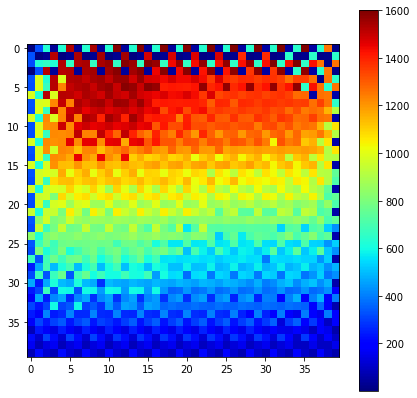

In [10]:
spider = Hamilton(spider_moves, 40, 40, 0, 0)
spider.solve()
visualise(spider.board)

In this example, a little bit of backtracking was required. The number of times a step was taken reverted is stored in the `retries` member variable.

In [11]:
print('Number of retries: {}'.format(spider.retries))

Number of retries: 106


### Move patterns

To find some patterns in the moves, it may be interesting to look at the move number modulo two. For the rulesets Knight and Spider, this results in a checker board pattern. For the ruleset Metita, we the the following.

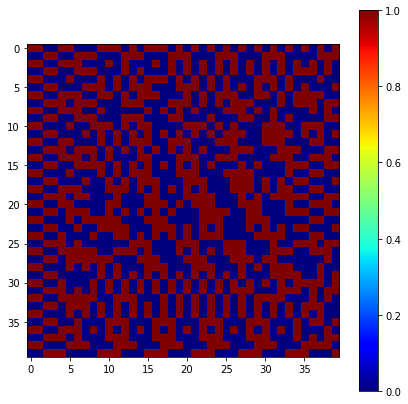

In [12]:
visualise(mod_board(metita.board, 2))

## Easy solutions

By limiting the number of allowed retries, we can find whether our heuristics are suitable for a given board and ruleset.

In [13]:
def easyness(domain, filename, closed, max_retries):
    values = []

    for i in domain:
        h = Hamilton(get_moves(filename), i, i, 0, 0, closed=closed, max_retries=max_retries)
        h.solve()
        values.append(h.retries)

    return values

In [14]:
figsize(15, 3)

domain = range(10, 100)

### Open paths

/tmp/ipykernel_3834965/549749485.py:10: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  return yaml.load(open(filename))['moves']


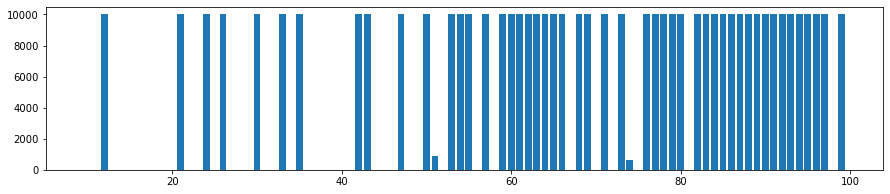

In [15]:
values = easyness(domain, 'metita.yml', False, 10000)
bar(domain, values);

/tmp/ipykernel_3834965/549749485.py:10: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  return yaml.load(open(filename))['moves']


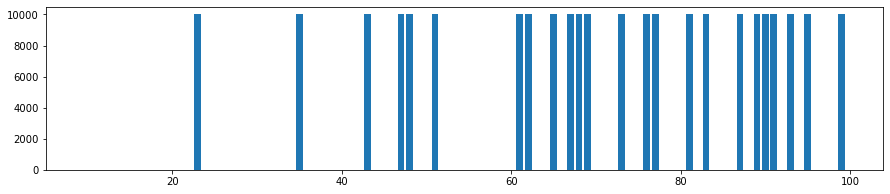

In [16]:
values = easyness(domain, 'knight.yml', False, 10000)
bar(domain, values);

/tmp/ipykernel_3834965/549749485.py:10: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  return yaml.load(open(filename))['moves']


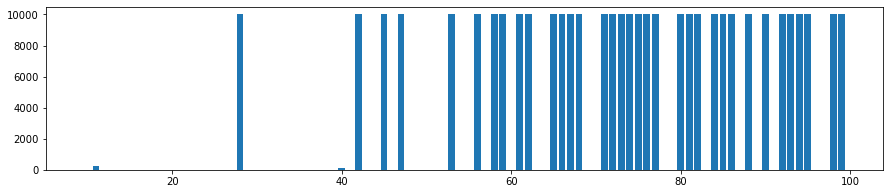

In [17]:
values = easyness(domain, 'spider.yml', False, 10000)
bar(domain, values);

At a first glance, Metita seems to be harder than Spider, which seems to be harder than Knight.

### Closed paths

/tmp/ipykernel_3834965/549749485.py:10: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  return yaml.load(open(filename))['moves']


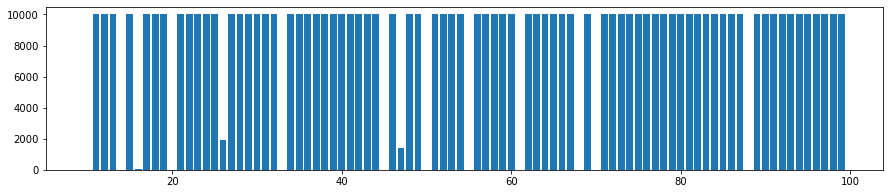

In [18]:
values = easyness(domain, 'metita.yml', True, 10000)
bar(domain, values);

/tmp/ipykernel_3834965/549749485.py:10: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  return yaml.load(open(filename))['moves']


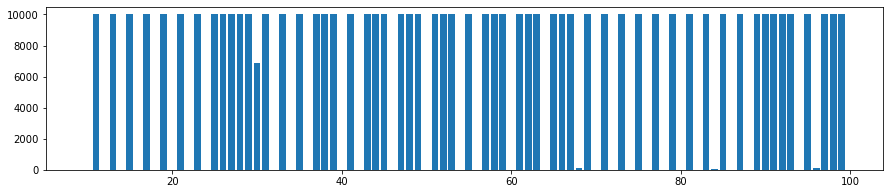

In [19]:
values = easyness(domain, 'knight.yml', True, 10000)
bar(domain, values);

/tmp/ipykernel_3834965/549749485.py:10: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  return yaml.load(open(filename))['moves']


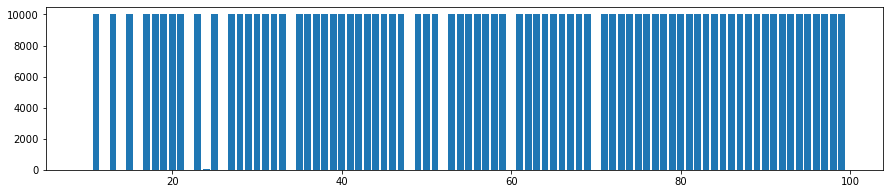

In [20]:
values = easyness(domain, 'spider.yml', True, 10000)
bar(domain, values);

Again, Knight seems to be the easiest, the other two rulesets seem equally hard.